# Week 4 : Classification Model


---

Today lab exercise will be using Penguin Dataset
- Download the **Penguin Dataset** from Elearn
- Upload the dataset to your own Github
- Import the dataset using URL from your Github

**METADATA** <br>
species: penguin species (Chinstrap, Adélie, or Gentoo) <br>
culmen_length_mm: culmen length (mm) <br>
culmen_depth_mm: culmen depth (mm) <br>
flipper_length_mm: flipper length (mm) <br>
body_mass_g: body mass (g) <br>
island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica) <br>
sex: penguin sex <br>

What are culmen length & depth? <br>
The culmen is "the upper ridge of a bird's beak" (definition from Oxford Languages).

## Import Libraries

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

1. Import dataset <br>
Display 10 sample rows from the dataset

In [47]:
data='https://raw.githubusercontent.com/sulthanahmed31/data-mining/refs/heads/main/penguins_size.csv'
df=pd.read_csv(data)
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


## Exploratory Data Analysis

2. Display the info column and conclude what the insight is from that column

In [48]:
df.info()
#Secara keseluruhan, data memiliki beberapa nilai yang hilang pada kolom culmen_length_mm, culmen_depth_mm, flipper_length_mm, body_mass_g, dan sex.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


3. Show describe column and conclude what the insight is from that column

In [10]:
df.describe() #untuk memunculkan deskripsi tentang total,rata-rata,dll

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


4. display the number of each unique value in species, island, and sex columns (including NaN)

In [81]:
print(df.value_counts('species', dropna=False))
print(df.value_counts('island', dropna=False))
print(df.value_counts('sex', dropna=False))

species
Adelie       146
Gentoo       120
Chinstrap     68
Name: count, dtype: int64
island
Biscoe       164
Dream        123
Torgersen     47
Name: count, dtype: int64
sex
MALE      169
FEMALE    165
Name: count, dtype: int64


5. Drop the null column(s)

In [82]:
df.dropna(inplace=True)
df.isnull().sum()

,0
species,0
island,0
culmen_length_mm,0
culmen_depth_mm,0
flipper_length_mm,0
body_mass_g,0
sex,0


6. Change the value "." in sex column, try to predict it based on other features (try to groupby 'sex' with Gentoo species in describe)

In [83]:
df.iloc[[327]]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,MALE


In [84]:
df.loc[df['sex'] == '.', 'sex'] = 'MALE'

In [85]:
df.iloc[[327]]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,MALE


7. Create your own insightful visualization and explain it in at least 2 sentences

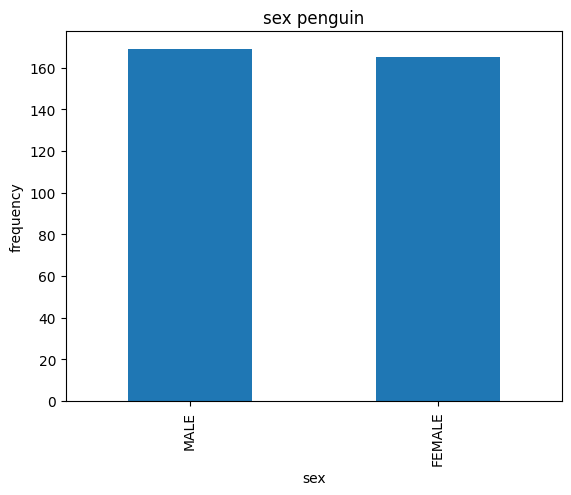

In [86]:

  df[col].value_counts().plot(kind='bar')
  plt.title("sex penguin")
  plt.xlabel('sex')
  plt.ylabel("frequency")
  plt.show()
  #male penguin more than female penguin,they are more than 160

8. Check unique value of our target variable

In [87]:
for column in ['species']:
  print(df[column].unique())

['Adelie' 'Chinstrap' 'Gentoo']


9. encode categorical columns and display the results

In [88]:
island_en = {'Torgersen' : 2, 'Biscoe' : 0, 'Dream' : 1}
sex_en = {'MALE' : 1, 'FEMALE' : 0}

df['island'] = df['island'].map(island_en)
df['sex'] = df['sex'].map(sex_en)
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,2,39.1,18.7,181.0,3750.0,1
1,Adelie,2,39.5,17.4,186.0,3800.0,0
2,Adelie,2,40.3,18.0,195.0,3250.0,0
4,Adelie,2,36.7,19.3,193.0,3450.0,0
5,Adelie,2,39.3,20.6,190.0,3650.0,1


10. encode the target column and display the results

In [89]:
species_n = {'Adelie':0,'Chinstrap':1,'Gentoo':2}
df['species'] = df['species'].map(species_n)
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.1,18.7,181.0,3750.0,1
1,0,2,39.5,17.4,186.0,3800.0,0
2,0,2,40.3,18.0,195.0,3250.0,0
4,0,2,36.7,19.3,193.0,3450.0,0
5,0,2,39.3,20.6,190.0,3650.0,1


11. create a heatmap to see the correlation and explain the conclusion

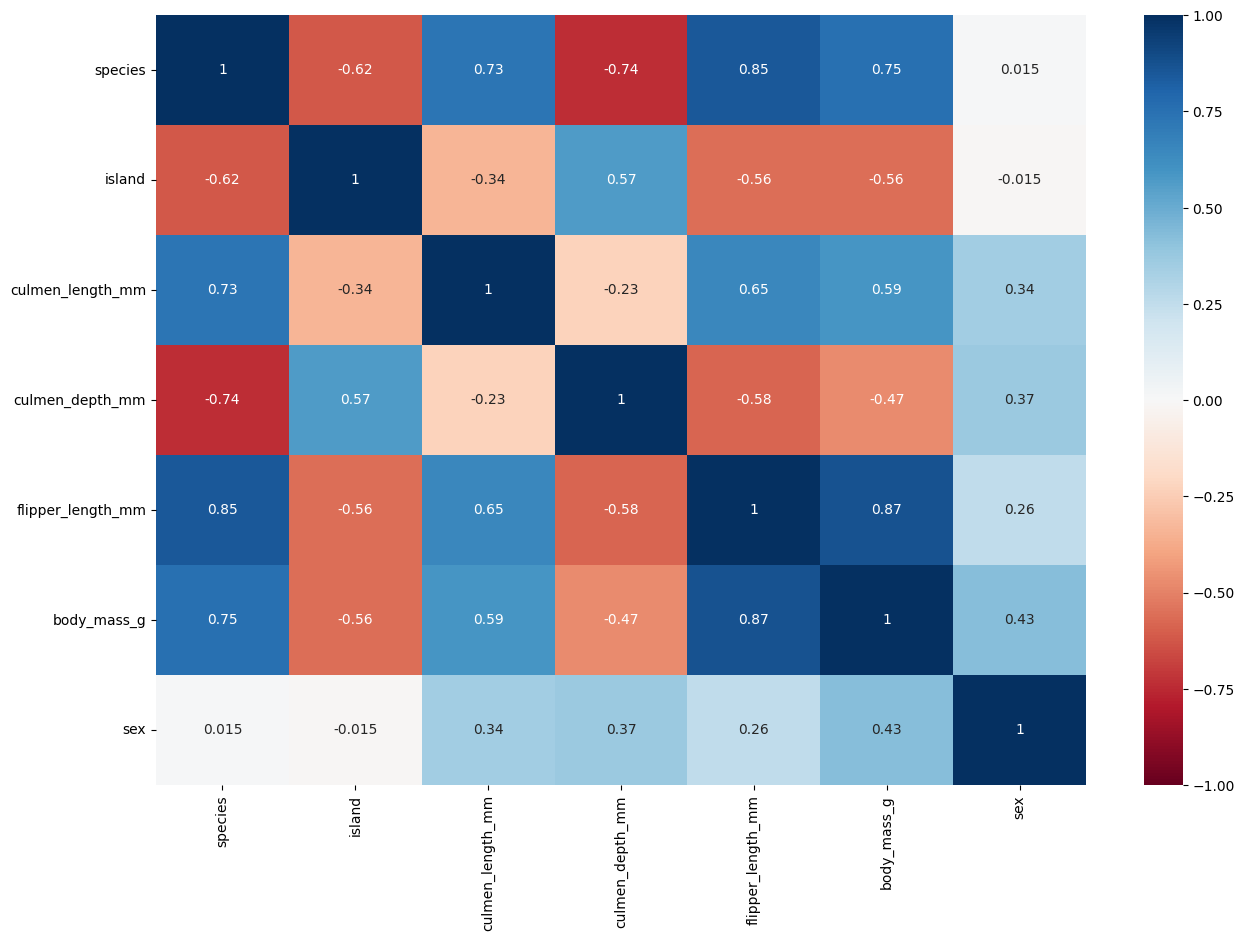

In [90]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), cmap='RdBu',
vmin=-1, vmax=1, annot=True)
plt.show()

## Machine Learning

1. Splitting X and y

In [91]:
X=df.drop(['species'],axis=1)
y=df['species']


2. Split data into training and test set (test size 20% and random state 42) and check the shape of X_train and X_test

In [92]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X, y,test_size= 0.20 ,random_state=42)

In [93]:
X_train.shape, X_test.shape

((267, 6), (67, 6))

## Desicion Tree


---

a. Defining the model using criterion Entropy and Gini Index <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Check for overfitting and underfitting <br>
e. Visualize decision trees <br>
f. Confusion matrix <br>
g. Classification report <br>
h. Results and conclusion <br>

1. Criterion Entropy

In [94]:
# Import DecisionTreeClassifier from sklearn
from sklearn.tree import DecisionTreeClassifier
# Instantiate the DecisionTreeClassifier model using the 'entropy' criterion
clf_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
# Fit the model with training data
clf_entropy.fit(X_train, y_train)
DecisionTreeClassifier
DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [95]:
# Make predictions using the model with the 'entropy' criterion
y_pred_entropy = clf_entropy.predict(X_test)

In [96]:
from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion entropy: {0:0.4f}'. format (accuracy_score(y_test, y_pred_entropy)))

Model accuracy score with criterion entropy: 0.9701


In [97]:
print('Training set score: {:.4f}'.format(clf_entropy.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf_entropy.score(X_test, y_test)))

Training set score: 0.9625
Test set score: 0.9701


[Text(0.5416666666666666, 0.875, 'x[3] <= 206.5\nentropy = 1.524\nsamples = 267\nvalue = [115, 55, 97]'),
 Text(0.3333333333333333, 0.625, 'x[1] <= 42.35\nentropy = 0.938\nsamples = 164\nvalue = [113.0, 50.0, 1.0]'),
 Text(0.4375, 0.75, 'True  '),
 Text(0.16666666666666666, 0.375, 'x[2] <= 16.7\nentropy = 0.078\nsamples = 105\nvalue = [104, 1, 0]'),
 Text(0.08333333333333333, 0.125, 'entropy = 0.592\nsamples = 7\nvalue = [6, 1, 0]'),
 Text(0.25, 0.125, 'entropy = 0.0\nsamples = 98\nvalue = [98, 0, 0]'),
 Text(0.5, 0.375, 'x[4] <= 4075.0\nentropy = 0.736\nsamples = 59\nvalue = [9, 49, 1]'),
 Text(0.4166666666666667, 0.125, 'entropy = 0.159\nsamples = 43\nvalue = [1, 42, 0]'),
 Text(0.5833333333333334, 0.125, 'entropy = 1.272\nsamples = 16\nvalue = [8, 7, 1]'),
 Text(0.75, 0.625, 'x[2] <= 17.65\nentropy = 0.417\nsamples = 103\nvalue = [2.0, 5.0, 96.0]'),
 Text(0.6458333333333333, 0.75, '  False'),
 Text(0.6666666666666666, 0.375, 'entropy = 0.0\nsamples = 96\nvalue = [0, 0, 96]'),
 Text(

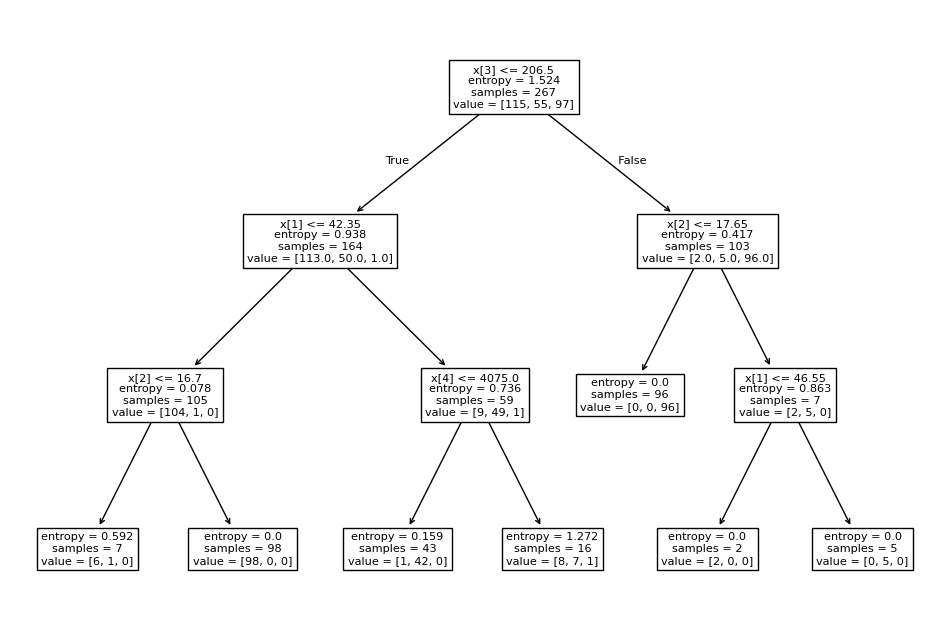

In [98]:
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(clf_entropy.fit(X_train, y_train))

2. Criterion Gini index

In [99]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [100]:
y_pred_gini = clf_gini.predict(X_test)

In [101]:
from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score (y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.9851


In [102]:
print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.9738
Test set score: 0.9851


[Text(0.5416666666666666, 0.875, 'x[3] <= 206.5\ngini = 0.64\nsamples = 267\nvalue = [115, 55, 97]'),
 Text(0.3333333333333333, 0.625, 'x[1] <= 43.35\ngini = 0.432\nsamples = 164\nvalue = [113.0, 50.0, 1.0]'),
 Text(0.4375, 0.75, 'True  '),
 Text(0.16666666666666666, 0.375, 'x[1] <= 42.35\ngini = 0.068\nsamples = 113\nvalue = [109, 4, 0]'),
 Text(0.08333333333333333, 0.125, 'gini = 0.019\nsamples = 105\nvalue = [104, 1, 0]'),
 Text(0.25, 0.125, 'gini = 0.469\nsamples = 8\nvalue = [5, 3, 0]'),
 Text(0.5, 0.375, 'x[0] <= 1.5\ngini = 0.18\nsamples = 51\nvalue = [4, 46, 1]'),
 Text(0.4166666666666667, 0.125, 'gini = 0.117\nsamples = 49\nvalue = [2.0, 46.0, 1.0]'),
 Text(0.5833333333333334, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [2, 0, 0]'),
 Text(0.75, 0.625, 'x[2] <= 17.65\ngini = 0.129\nsamples = 103\nvalue = [2.0, 5.0, 96.0]'),
 Text(0.6458333333333333, 0.75, '  False'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 96\nvalue = [0, 0, 96]'),
 Text(0.8333333333333334, 0.375, 

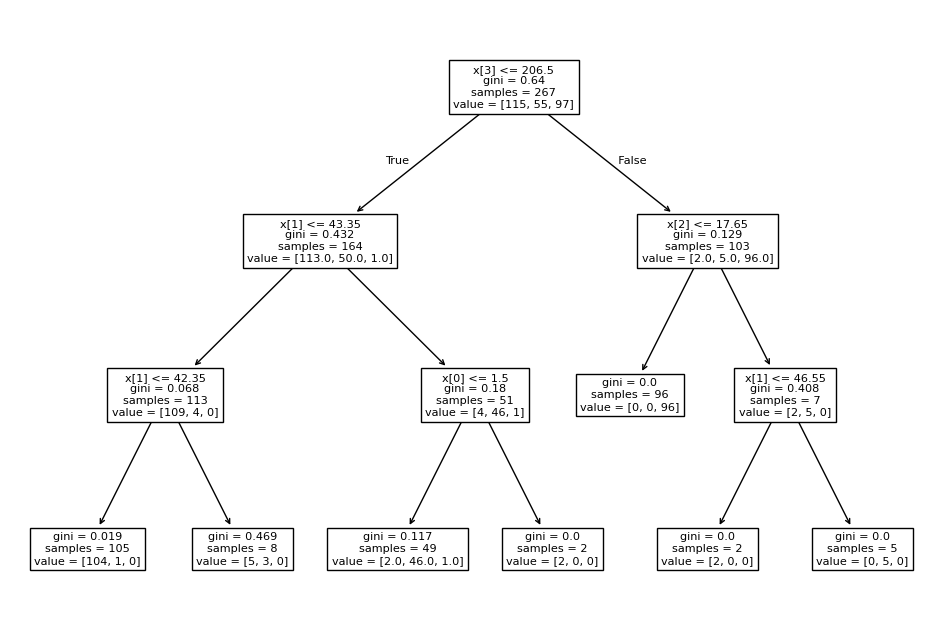

In [103]:
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(clf_gini.fit(X_train, y_train))

3. Confusion matrix and classification report of criterion Entropy and Gini index

In [104]:
from sklearn.metrics import confusion_matrix, classification_report


In [105]:
clf_entropy = DecisionTreeClassifier(criterion="entropy")
clf_entropy.fit(X_train, y_train)
y_pred_entropy = clf_entropy.predict(X_test)

conf_matrix_entropy = confusion_matrix(y_test, y_pred_entropy)
print("Confusion Matrix Entropy:\n", conf_matrix_entropy)

conf_matrix_gini = confusion_matrix(y_test, y_pred_gini)
print("Confusion Matrix Gini Index:\n", conf_matrix_gini)

Confusion Matrix Entropy:
 [[30  1  0]
 [ 0 13  0]
 [ 0  0 23]]
Confusion Matrix Gini Index:
 [[31  0  0]
 [ 1 12  0]
 [ 0  0 23]]


In [106]:
print("\nClassification Report for Entropy:\n", classification_report(y_test, y_pred_entropy))

print("\nClassification Report for Gini Index:\n", classification_report(y_test,y_pred_gini))



Classification Report for Entropy:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98        31
           1       0.93      1.00      0.96        13
           2       1.00      1.00      1.00        23

    accuracy                           0.99        67
   macro avg       0.98      0.99      0.98        67
weighted avg       0.99      0.99      0.99        67


Classification Report for Gini Index:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98        31
           1       1.00      0.92      0.96        13
           2       1.00      1.00      1.00        23

    accuracy                           0.99        67
   macro avg       0.99      0.97      0.98        67
weighted avg       0.99      0.99      0.98        67



## Naive Bayes


---

a. Defining the model <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Confusion matrix <br>
e. Classification report <br>
f. Results and conclusion <br>

library : from sklearn.naive_bayes import GaussianNB

In [107]:
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

GaussianNB()

In [108]:
nb_y_pred = nb_classifier.predict(X_test)

In [109]:

nb_conf_matrix = confusion_matrix(y_test, nb_y_pred)
print("Confusion Matrix:\n", nb_conf_matrix)

Confusion Matrix:
 [[31  0  0]
 [ 0 13  0]
 [ 0  0 23]]


In [110]:
print("\nClassification Report:\n", classification_report(y_test,nb_y_pred))



Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        23

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



Good Luck :)